In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_data = pd.read_csv('dataset/winequality-red.csv')

In [3]:
wine_data.shape
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
correlation_matrix = wine_data.corr()

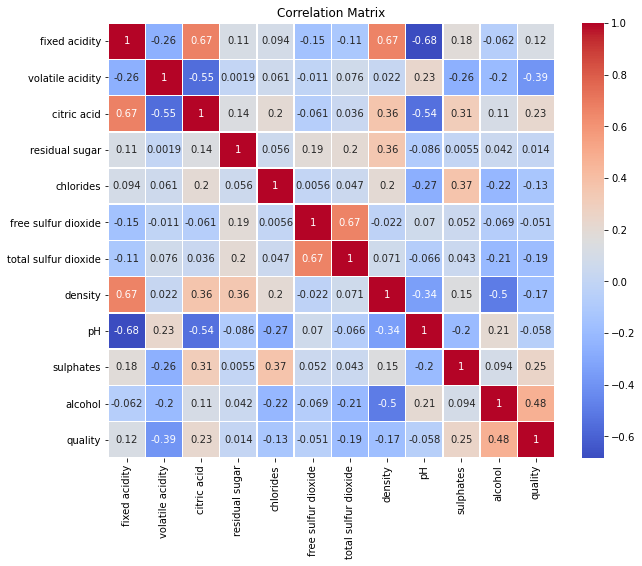

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
x = wine_data.drop('quality', axis=1)

In [16]:
# Binarizing quality based on whther its good quality or bad considering that any score above 7 is good quality and anything below is bad quality
y = wine_data['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [17]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [19]:
#Applying Random Forest Classifier as an Ensemble Model because we need multiple decision trees

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
#Evaluating based on accuracy

training_pred = model.predict(x_train)
training_accuracy = accuracy_score(training_pred, y_train)

test_pred = model.predict(x_test)
test_accuracy = accuracy_score(test_pred, y_test)

print('Training Accuracy: ', training_accuracy)
print('Testing Accuracy: ', test_accuracy)

Training Accuracy:  1.0
Testing Accuracy:  0.921875


In [22]:
#Building the Predictive System

input_data = (7.5, 0.5, 0.36, 6.1, 0.071, 17.0 , 102.0, 0.9090, 2.25, 0.2, 10.4)
input_np = np.asarray(input_data)
input_reshaped = input_np.reshape(1, -1)

prediction = model.predict(input_reshaped)
if (prediction[0]==1):
    print('Good Quality')
else:
    print('Bad Quality')


Bad Quality
